# **IMAGE SAMPLING PROGRAM - DOWNSAMPLING & UPSAMPLING**

**Cara pakai:**
1. Upload gambar ke Google Colab (klik folder icon di sidebar)
2. Ganti nama file di variabel IMAGE_PATH
3. Jalankan semua cell


# **SECTION 1**: IMPORT LIBRARIES



In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image, ImageFilter
from scipy import ndimage
from scipy.interpolate import griddata
import os
from google.colab import files
import seaborn as sns

# Set style untuk plot yang bagus
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (15, 10)
sns.set_palette("husl")

print("Libraries imported successfully!")
print("Ready to process images!")
print("="*60)

Libraries imported successfully!
Ready to process images!


# **SECTION 2**: UPLOAD & LOAD IMAGE


In [3]:
def upload_and_load_image():
    """Upload gambar dari komputer ke Google Colab"""
    print("Upload your image file...")
    uploaded = files.upload()

    # Get the uploaded filename
    filename = list(uploaded.keys())[0]
    print(f"File uploaded: {filename}")

    return filename

def load_image_from_path(image_path):
    """Load gambar dari path yang sudah ada"""
    try:
        # Load dengan OpenCV (BGR format)
        img_bgr = cv2.imread(image_path)
        # Convert ke RGB untuk matplotlib
        img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

        print(f"Image loaded successfully!")
        print(f"Image dimensions: {img_rgb.shape}")
        print(f"Image type: {img_rgb.dtype}")

        return img_rgb
    except Exception as e:
        print(f"Error loading image: {e}")
        return None

# ============================================================================

# Gunakan gambar yang sudah ada (ganti nama file sesuai gambar Anda)
IMAGE_PATH = "C3B73035-B5C6-4375-85EA-8D665C26CBDA.JPG"  # GANTI INI DENGAN NAMA FILE GAMBAR ANDA
original_image = load_image_from_path(IMAGE_PATH)

print("="*60)

Image loaded successfully!
Image dimensions: (1280, 1280, 3)
Image type: uint8


# **SECTION 3**: DISPLAY ORIGINAL IMAGE

ORIGINAL IMAGE INFORMATION
----------------------------------------
Width: 1280 pixels
Height: 1280 pixels
Channels: 3
Total pixels: 1,638,400
Data type: uint8
Value range: 0 - 255


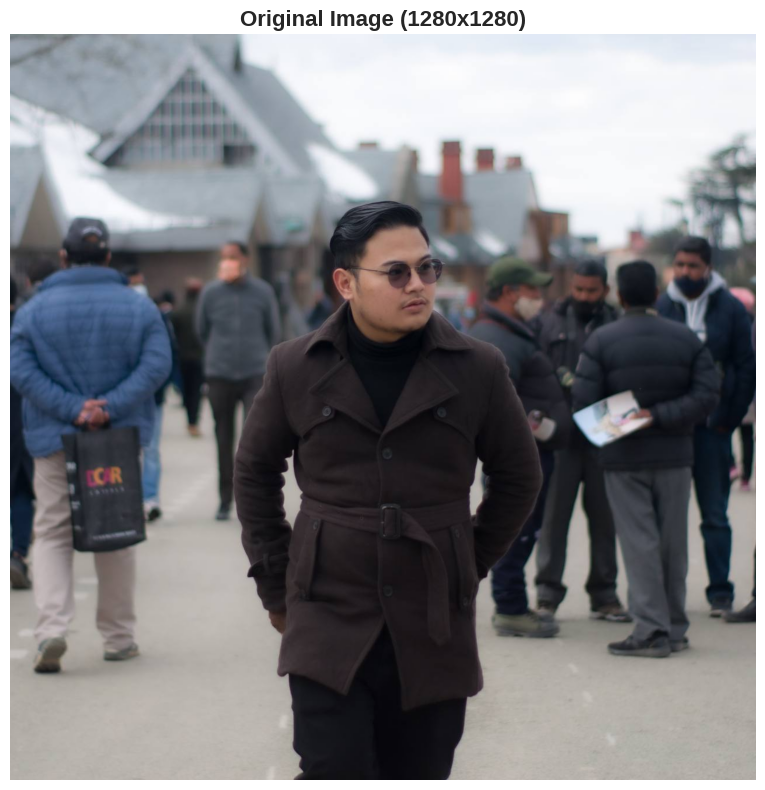

In [4]:
def display_original_info(img):
    """Tampilkan informasi gambar asli"""
    print("ORIGINAL IMAGE INFORMATION")
    print("-" * 40)
    print(f"Width: {img.shape[1]} pixels")
    print(f"Height: {img.shape[0]} pixels")
    print(f"Channels: {img.shape[2]}")
    print(f"Total pixels: {img.shape[0] * img.shape[1]:,}")
    print(f"Data type: {img.dtype}")
    print(f"Value range: {img.min()} - {img.max()}")

    # Display original image
    plt.figure(figsize=(12, 8))
    plt.imshow(img)
    plt.title(f'Original Image ({img.shape[1]}x{img.shape[0]})', fontsize=16, fontweight='bold')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

display_original_info(original_image)
print("="*60)

# **SECTION 4**: DOWNSAMPLING FUNCTIONS

In [5]:
print("DOWNSAMPLING METHODS")
print("-" * 40)

def downsample_max_pooling(img, factor):
    """Downsampling dengan Max Pooling"""
    h, w = img.shape[:2]
    new_h, new_w = h // factor, w // factor

    if len(img.shape) == 3:
        downsampled = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)
        for c in range(img.shape[2]):
            for i in range(new_h):
                for j in range(new_w):
                    window = img[i*factor:(i+1)*factor, j*factor:(j+1)*factor, c]
                    downsampled[i, j, c] = np.max(window)
    else:
        downsampled = np.zeros((new_h, new_w), dtype=img.dtype)
        for i in range(new_h):
            for j in range(new_w):
                window = img[i*factor:(i+1)*factor, j*factor:(j+1)*factor]
                downsampled[i, j] = np.max(window)

    return downsampled

def downsample_average_pooling(img, factor):
    """Downsampling dengan Average Pooling"""
    h, w = img.shape[:2]
    new_h, new_w = h // factor, w // factor

    if len(img.shape) == 3:
        downsampled = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)
        for c in range(img.shape[2]):
            for i in range(new_h):
                for j in range(new_w):
                    window = img[i*factor:(i+1)*factor, j*factor:(j+1)*factor, c]
                    downsampled[i, j, c] = np.mean(window)
    else:
        downsampled = np.zeros((new_h, new_w), dtype=img.dtype)
        for i in range(new_h):
            for j in range(new_w):
                window = img[i*factor:(i+1)*factor, j*factor:(j+1)*factor]
                downsampled[i, j] = np.mean(window)

    return downsampled.astype(img.dtype)

def downsample_median_pooling(img, factor):
    """Downsampling dengan Median Pooling"""
    h, w = img.shape[:2]
    new_h, new_w = h // factor, w // factor

    if len(img.shape) == 3:
        downsampled = np.zeros((new_h, new_w, img.shape[2]), dtype=img.dtype)
        for c in range(img.shape[2]):
            for i in range(new_h):
                for j in range(new_w):
                    window = img[i*factor:(i+1)*factor, j*factor:(j+1)*factor, c]
                    downsampled[i, j, c] = np.median(window)
    else:
        downsampled = np.zeros((new_h, new_w), dtype=img.dtype)
        for i in range(new_h):
            for j in range(new_w):
                window = img[i*factor:(i+1)*factor, j*factor:(j+1)*factor]
                downsampled[i, j] = np.median(window)

    return downsampled.astype(img.dtype)

DOWNSAMPLING METHODS
----------------------------------------


# **SECTION 5**: APPLY DOWNSAMPLING

Applying downsampling with factor: 4
Processing...
Downsampling completed!


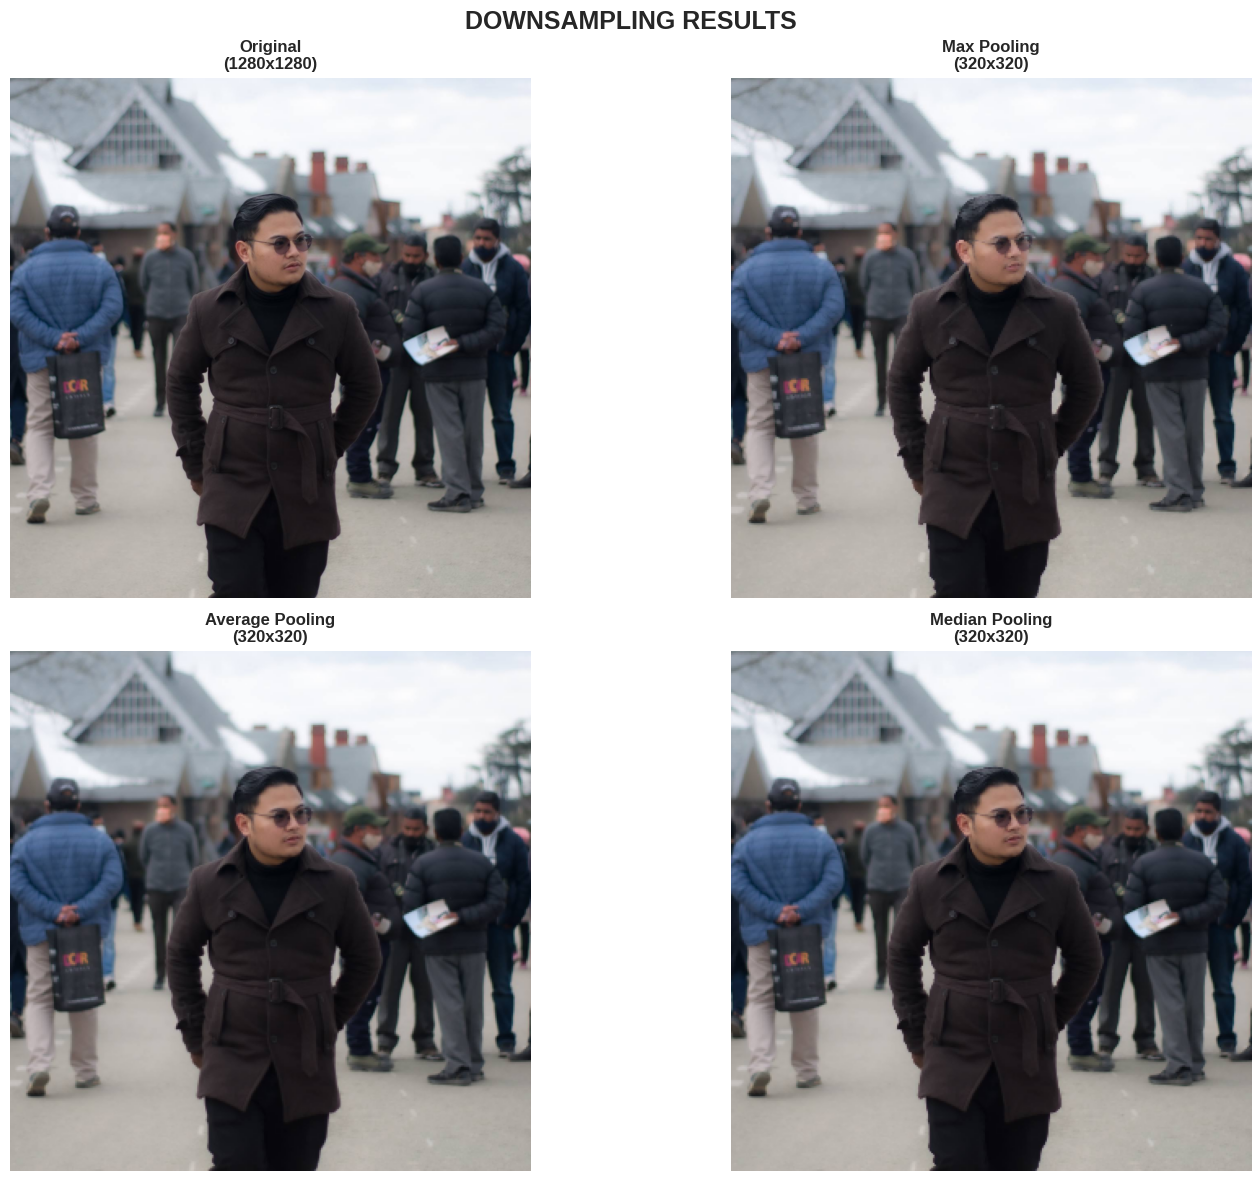

In [6]:
# Parameter downsampling
DOWNSAMPLE_FACTOR = 4  # Ganti ini untuk mengubah faktor downsampling

print(f"Applying downsampling with factor: {DOWNSAMPLE_FACTOR}")
print("Processing...")

# Apply downsampling methods
img_max = downsample_max_pooling(original_image, DOWNSAMPLE_FACTOR)
img_avg = downsample_average_pooling(original_image, DOWNSAMPLE_FACTOR)
img_median = downsample_median_pooling(original_image, DOWNSAMPLE_FACTOR)

print("Downsampling completed!")

# Display downsampling results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Original
axes[0,0].imshow(original_image)
axes[0,0].set_title(f'Original\n({original_image.shape[1]}x{original_image.shape[0]})', fontweight='bold')
axes[0,0].axis('off')

# Max pooling
axes[0,1].imshow(img_max)
axes[0,1].set_title(f'Max Pooling\n({img_max.shape[1]}x{img_max.shape[0]})', fontweight='bold')
axes[0,1].axis('off')

# Average pooling
axes[1,0].imshow(img_avg)
axes[1,0].set_title(f'Average Pooling\n({img_avg.shape[1]}x{img_avg.shape[0]})', fontweight='bold')
axes[1,0].axis('off')

# Median pooling
axes[1,1].imshow(img_median)
axes[1,1].set_title(f'Median Pooling\n({img_median.shape[1]}x{img_median.shape[0]})', fontweight='bold')
axes[1,1].axis('off')

plt.suptitle('DOWNSAMPLING RESULTS', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

print("="*60)

# **SECTION 6**: UPSAMPLING FUNCTIONS  

In [7]:
print("UPSAMPLING METHODS")
print("-" * 40)

def upsample_nearest_neighbor(img, factor):
    """Upsampling dengan Nearest Neighbor"""
    return cv2.resize(img, None, fx=factor, fy=factor, interpolation=cv2.INTER_NEAREST)

def upsample_bilinear(img, factor):
    """Upsampling dengan Bilinear Interpolation"""
    return cv2.resize(img, None, fx=factor, fy=factor, interpolation=cv2.INTER_LINEAR)

def upsample_bicubic(img, factor):
    """Upsampling dengan Bicubic Interpolation"""
    return cv2.resize(img, None, fx=factor, fy=factor, interpolation=cv2.INTER_CUBIC)

UPSAMPLING METHODS
----------------------------------------


# **SECTION 7**: APPLY UPSAMPLING

Applying upsampling with factor: 4
Processing...
Upsampling completed!


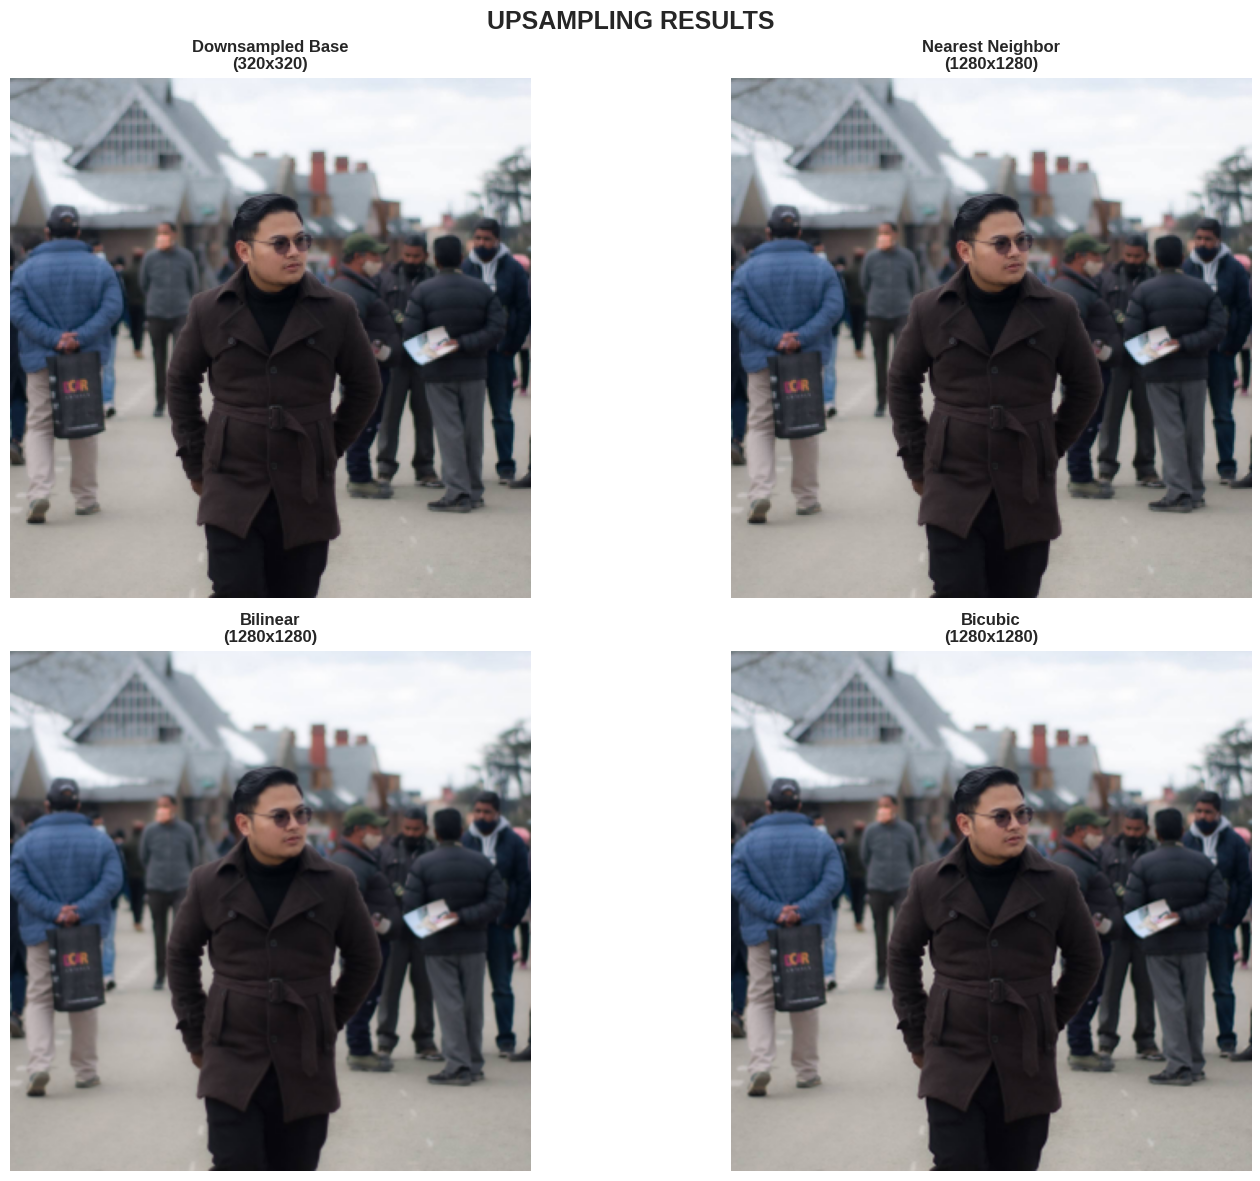

In [8]:
# Parameter upsampling
UPSAMPLE_FACTOR = 4  # Ganti ini untuk mengubah faktor upsampling

print(f"Applying upsampling with factor: {UPSAMPLE_FACTOR}")
print("Processing...")

# Use average pooled image sebagai base untuk upsampling
base_image = img_avg

# Apply upsampling methods
img_nearest = upsample_nearest_neighbor(base_image, UPSAMPLE_FACTOR)
img_bilinear = upsample_bilinear(base_image, UPSAMPLE_FACTOR)
img_bicubic = upsample_bicubic(base_image, UPSAMPLE_FACTOR)

print("Upsampling completed!")

# Display upsampling results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Downsampled base
axes[0,0].imshow(base_image)
axes[0,0].set_title(f'Downsampled Base\n({base_image.shape[1]}x{base_image.shape[0]})', fontweight='bold')
axes[0,0].axis('off')

# Nearest neighbor
axes[0,1].imshow(img_nearest)
axes[0,1].set_title(f'Nearest Neighbor\n({img_nearest.shape[1]}x{img_nearest.shape[0]})', fontweight='bold')
axes[0,1].axis('off')

# Bilinear
axes[1,0].imshow(img_bilinear)
axes[1,0].set_title(f'Bilinear\n({img_bilinear.shape[1]}x{img_bilinear.shape[0]})', fontweight='bold')
axes[1,0].axis('off')

# Bicubic
axes[1,1].imshow(img_bicubic)
axes[1,1].set_title(f'Bicubic\n({img_bicubic.shape[1]}x{img_bicubic.shape[0]})', fontweight='bold')
axes[1,1].axis('off')

plt.suptitle('UPSAMPLING RESULTS', fontsize=18, fontweight='bold')
plt.tight_layout()
plt.show()

print("="*60)

# **SECTION 8**: COMPARISON & ANALYSIS

In [9]:
print("COMPARISON & ANALYSIS")
print("-" * 40)

# Compare all methods in one plot
fig, axes = plt.subplots(3, 3, figsize=(20, 20))

images = [
    (original_image, "Original"),
    (img_max, "Max Pooling"),
    (img_avg, "Average Pooling"),
    (img_median, "Median Pooling"),
    (base_image, "Base (for upsampling)"),
    (img_nearest, "Nearest Neighbor Up"),
    (img_bilinear, "Bilinear Up"),
    (img_bicubic, "Bicubic Up")
]

for i, (img, title) in enumerate(images):
    row = i // 3
    col = i % 3
    if i < len(images):
        axes[row, col].imshow(img)
        axes[row, col].set_title(f'{title}\n{img.shape[1]}x{img.shape[0]}', fontweight='bold')
        axes[row, col].axis('off')

# Hide the last subplot if not needed
if len(images) < 9:
    axes[2, 2].axis('off')

plt.suptitle('ALL METHODS COMPARISON', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# **SECTION 9**: QUALITY METRICS

In [10]:
def calculate_mse(img1, img2):
    """Calculate Mean Squared Error"""
    # Resize images to same size for comparison
    if img1.shape != img2.shape:
        img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
        return np.mean((img1.astype(float) - img2_resized.astype(float)) ** 2)
    return np.mean((img1.astype(float) - img2.astype(float)) ** 2)

def calculate_psnr(img1, img2):
    """Calculate Peak Signal-to-Noise Ratio"""
    mse = calculate_mse(img1, img2)
    if mse == 0:
        return float('inf')
    return 20 * np.log10(255.0 / np.sqrt(mse))

print("QUALITY ANALYSIS")
print("-" * 40)

# Calculate metrics for upsampled images vs original
metrics_data = []

for method, img in [("Nearest Neighbor", img_nearest),
                    ("Bilinear", img_bilinear),
                    ("Bicubic", img_bicubic)]:
    mse = calculate_mse(original_image, img)
    psnr = calculate_psnr(original_image, img)

    metrics_data.append({
        'Method': method,
        'MSE': mse,
        'PSNR': psnr,
        'File Size (approx)': f"{img.nbytes / 1024:.1f} KB"
    })

    print(f"{method:15} | MSE: {mse:8.2f} | PSNR: {psnr:6.2f} dB")

print("="*60)

QUALITY ANALYSIS
----------------------------------------
Nearest Neighbor | MSE:    20.93 | PSNR:  34.92 dB
Bilinear        | MSE:     8.76 | PSNR:  38.71 dB
Bicubic         | MSE:     5.16 | PSNR:  41.00 dB


# **SECTION 10**: SUMMARY & RECOMMENDATIONS

In [12]:
print("SUMMARY & RECOMMENDATIONS")
print("="*60)

print("""
DOWNSAMPLING METHODS:
┌─────────────────┬──────────────────────────────────────┐
│ Method          │ Best For                             │
├─────────────────┼──────────────────────────────────────┤
│ Max Pooling     │ Preserving bright features/edges    │
│ Average Pooling │ General purpose, balanced results    │
│ Median Pooling  │ Noise reduction, outlier handling   │
└─────────────────┴──────────────────────────────────────┘

UPSAMPLING METHODS:
┌─────────────────┬──────────────────────────────────────┐
│ Method          │ Best For                             │
├─────────────────┼──────────────────────────────────────┤
│ Nearest Neighbor│ Pixel art, sharp edges, fast        │
│ Bilinear        │ Natural images, good quality/speed  │
│ Bicubic         │ Smooth images, highest quality       │
└─────────────────┴──────────────────────────────────────┘

TIPS:
• Use Average Pooling + Bicubic for best quality
• Use Max Pooling + Nearest for preserving details
• Consider image content when choosing methods
• Higher factors = more quality loss
""")

print("Analysis completed!")
print("="*60)

SUMMARY & RECOMMENDATIONS

DOWNSAMPLING METHODS:
┌─────────────────┬──────────────────────────────────────┐
│ Method          │ Best For                             │
├─────────────────┼──────────────────────────────────────┤
│ Max Pooling     │ Preserving bright features/edges    │
│ Average Pooling │ General purpose, balanced results    │
│ Median Pooling  │ Noise reduction, outlier handling   │
└─────────────────┴──────────────────────────────────────┘

UPSAMPLING METHODS:
┌─────────────────┬──────────────────────────────────────┐
│ Method          │ Best For                             │
├─────────────────┼──────────────────────────────────────┤
│ Nearest Neighbor│ Pixel art, sharp edges, fast        │
│ Bilinear        │ Natural images, good quality/speed  │
│ Bicubic         │ Smooth images, highest quality       │
└─────────────────┴──────────────────────────────────────┘

TIPS:
• Use Average Pooling + Bicubic for best quality
• Use Max Pooling + Nearest for preserving details
•

# **SECTION 11**: SAVE RESULTS (optional)
---



In [13]:
def save_results():
    """Save processed images"""
    print("Saving results...")

    # Create results directory
    if not os.path.exists('sampling_results'):
        os.makedirs('sampling_results')

    # Save images
    cv2.imwrite('sampling_results/original.jpg', cv2.cvtColor(original_image, cv2.COLOR_RGB2BGR))
    cv2.imwrite('sampling_results/max_pooling.jpg', cv2.cvtColor(img_max, cv2.COLOR_RGB2BGR))
    cv2.imwrite('sampling_results/avg_pooling.jpg', cv2.cvtColor(img_avg, cv2.COLOR_RGB2BGR))
    cv2.imwrite('sampling_results/median_pooling.jpg', cv2.cvtColor(img_median, cv2.COLOR_RGB2BGR))
    cv2.imwrite('sampling_results/nearest_up.jpg', cv2.cvtColor(img_nearest, cv2.COLOR_RGB2BGR))
    cv2.imwrite('sampling_results/bilinear_up.jpg', cv2.cvtColor(img_bilinear, cv2.COLOR_RGB2BGR))
    cv2.imwrite('sampling_results/bicubic_up.jpg', cv2.cvtColor(img_bicubic, cv2.COLOR_RGB2BGR))

    print("Results saved in 'sampling_results' folder!")

# Uncomment line below to save results
# save_results()

print("""
PROGRAM SELESAI!
Anda telah berhasil menerapkan semua metode sampling pada gambar!

Untuk menggunakan gambar lain:
1. Upload gambar baru ke folder Files
2. Ganti IMAGE_PATH di Section 2
3. Jalankan ulang program
""")


PROGRAM SELESAI!
Anda telah berhasil menerapkan semua metode sampling pada gambar!

Untuk menggunakan gambar lain:
1. Upload gambar baru ke folder Files
2. Ganti IMAGE_PATH di Section 2
3. Jalankan ulang program

